In [1]:
using ApproxFun
using PyPlot

  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:32
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in depwarn(::String, ::Symbol) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in @linux(::Any, ::Any) at ./deprecated.jl:484
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in eval(::Module, ::Any) at ./boot.jl:234
 in eval(::Module, ::Any) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in require(::Symbol) at ./loading.jl:415
 in require(::Symbol) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in include_string(::String, ::String

# Parabola fit

Consider fitting 7 equally spaced data points to a parabola. The matrix representation of this operation is,

$$ \min \frac{1}{2} \lVert \mathbf{y} - A \mathbf{x} \rVert^2 $$

In [149]:
power_row(t, n) = [t^i for i in 0:n]
power_mat(t, n) = hcat(power_row.(t, n)...)

power_mat (generic function with 1 method)

In [170]:
t = linspace(-1, 1, 27)
A = hcat(power_row.(t, 4)...)'

27×5 Array{Float64,2}:
 1.0  -1.0        1.0         -1.0          1.0        
 1.0  -0.923077   0.852071    -0.786527     0.726025   
 1.0  -0.846154   0.715976    -0.605826     0.512622   
 1.0  -0.769231   0.591716    -0.455166     0.350128   
 1.0  -0.692308   0.47929     -0.331816     0.229719   
 1.0  -0.615385   0.378698    -0.233045     0.143412   
 1.0  -0.538462   0.289941    -0.156122     0.0840657  
 1.0  -0.461538   0.213018    -0.0983159    0.0453766  
 1.0  -0.384615   0.147929    -0.0568958    0.021883   
 1.0  -0.307692   0.0946746   -0.0291306    0.00896327 
 1.0  -0.230769   0.0532544   -0.0122895    0.00283604 
 1.0  -0.153846   0.0236686   -0.00364133   0.000560204
 1.0  -0.0769231  0.00591716  -0.000455166  3.50128e-5 
 ⋮                                                     
 1.0   0.153846   0.0236686    0.00364133   0.000560204
 1.0   0.230769   0.0532544    0.0122895    0.00283604 
 1.0   0.307692   0.0946746    0.0291306    0.00896327 
 1.0   0.384615   0.14792

In [171]:
Au, Ad, Av = svd(A, thin=false);

In [172]:
y1 = t.^4;

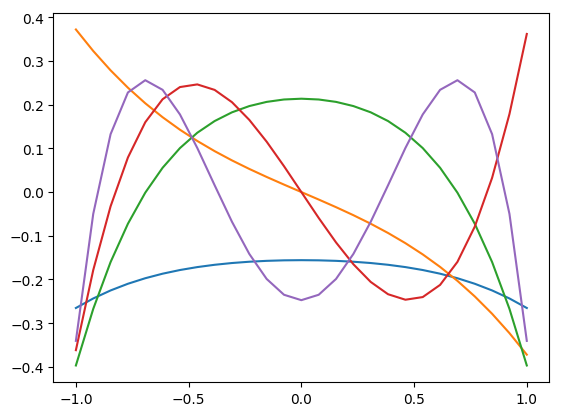

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32b1bf850>
 PyObject <matplotlib.lines.Line2D object at 0x32aa96cd0>
 PyObject <matplotlib.lines.Line2D object at 0x32aa730d0>
 PyObject <matplotlib.lines.Line2D object at 0x32b3234d0>
 PyObject <matplotlib.lines.Line2D object at 0x32b323610>

In [173]:
plot(t, Au[:, 1:5])

In [177]:
using Wavelets

INFO: Precompiling module Wavelets.


In [194]:
out = zeros(4,4)
for i in 1:4
    x = zeros(4)
    x[i] = 1.0
    out[i, :] = Wavelets.dwt(x, wavelet(WT.haar))
end

In [175]:
Av * [0, 0, 1, 0, 0]

5-element Array{Float64,1}:
  0.443494   
 -7.77156e-16
 -0.621863   
 -5.27991e-16
 -0.645444   

In [169]:
Ad ./ maximum(Ad)

5-element Array{Float64,1}:
 1.0      
 0.549675 
 0.137639 
 0.0701974
 0.048087 

In [174]:
Ad ./ maximum(Ad)

5-element Array{Float64,1}:
 1.0      
 0.652068 
 0.36244  
 0.126741 
 0.0572409

In [105]:
x1 = A \ y1

1-element Array{Float64,1}:
 1.0

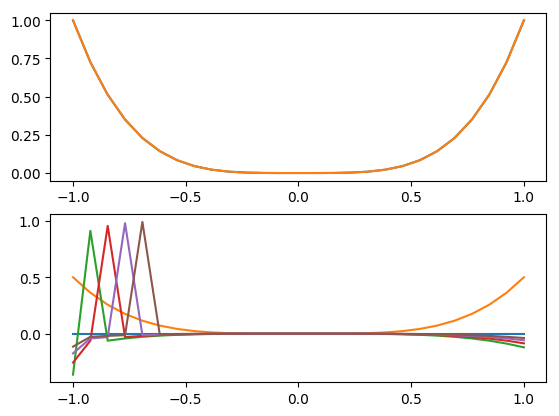

5-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32a2f50d0>
 PyObject <matplotlib.lines.Line2D object at 0x32a0cfad0>
 PyObject <matplotlib.lines.Line2D object at 0x32a4bcfd0>
 PyObject <matplotlib.lines.Line2D object at 0x32a4ddfd0>
 PyObject <matplotlib.lines.Line2D object at 0x32a4ddd90>

In [107]:
fig, axes = subplots(nrows=2)
axes[1][:plot](t, y1)
axes[1][:plot](t, A * x1)
axes[2][:plot](t, y1 - A * x1)
axes[2][:plot](t, Au[:, 1:5])

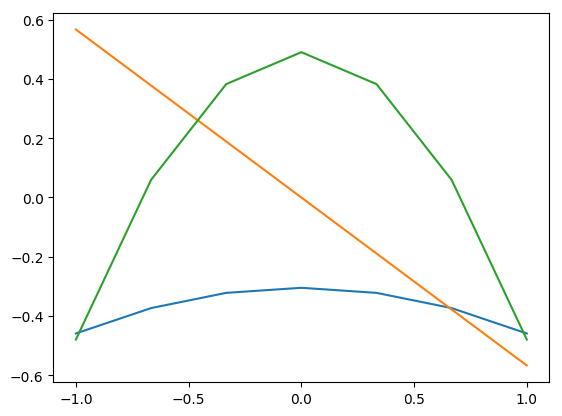

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32751f510>
 PyObject <matplotlib.lines.Line2D object at 0x327995bd0>
 PyObject <matplotlib.lines.Line2D object at 0x327995b50>

In [75]:
plot(t, Au[:, 1:3])

In [76]:
y1

7-element Array{Float64,1}:
 1.0      
 0.197531 
 0.0123457
 0.0      
 0.0123457
 0.197531 
 1.0      

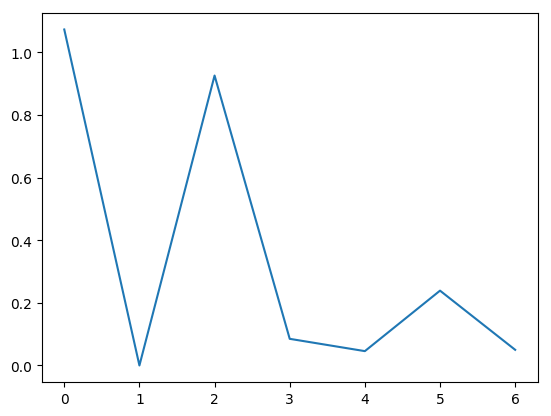

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x327f0b110>

In [78]:
plot(abs(Au' * y1))

In [ ]:
plot(r)

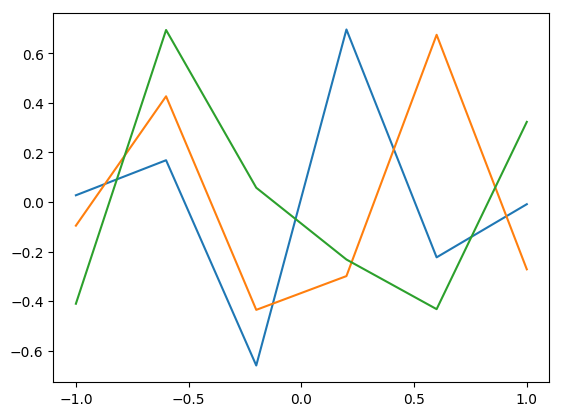

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3243aa9d0>
 PyObject <matplotlib.lines.Line2D object at 0x323c80890>
 PyObject <matplotlib.lines.Line2D object at 0x323caa250>

In [48]:
plot(t, Au[:, 4:end])

In [36]:
Ad

3-element Array{Float64,1}:
 2.92797 
 1.76383 
 0.920195

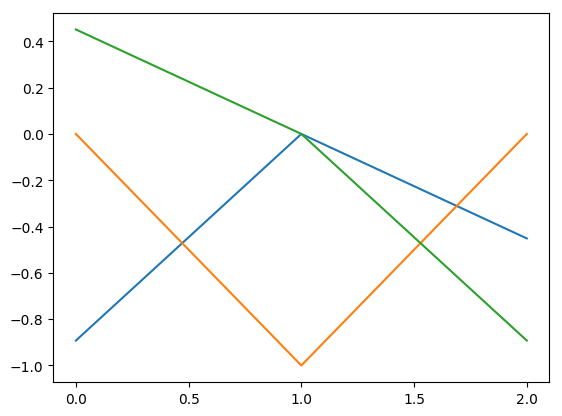

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32324fd10>
 PyObject <matplotlib.lines.Line2D object at 0x32023ed10>
 PyObject <matplotlib.lines.Line2D object at 0x32026efd0>

In [29]:
plot(Av)

In [46]:
Av

3×3 Array{Float64,2}:
 -0.881799  -0.0   0.471625
  0.0       -1.0   0.0     
 -0.471625   0.0  -0.881799

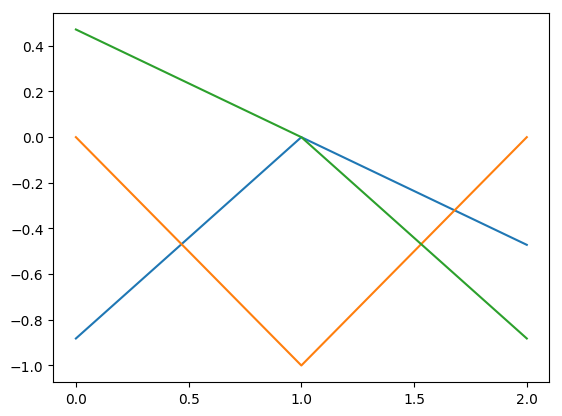

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323e05210>
 PyObject <matplotlib.lines.Line2D object at 0x323973050>
 PyObject <matplotlib.lines.Line2D object at 0x32339f3d0>

In [45]:
plot(Av)